In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import các thư viện cần thiết cho bài toán. thư viện sklearn của Python cho học máy có thể được sử dụng như thế nào để thực hiện các chức năng hồi quy

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

Lấy dataset theo đường dẫn đến file đã tải về từ NOAA sau khi xử lí

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/data2002C.csv')

Kiểm tra lại dữ liệu, cột TAVG biểu diễn nhiệt độ trung bình theo Date

In [ ]:
dataset.head(dataset.size)

,STATION,NAME,DATE,TAVG
0,VM000048900,"TAN SON HOA, VM",1/1/2002,25.555556
1,VM000048900,"TAN SON HOA, VM",1/2/2002,25.000000
2,VM000048900,"TAN SON HOA, VM",1/3/2002,25.000000
3,VM000048900,"TAN SON HOA, VM",1/4/2002,26.666667
4,VM000048900,"TAN SON HOA, VM",1/5/2002,26.111111
...,...,...,...,...
7379,VM000048900,"TAN SON HOA, VM",3/26/2022,30.555556
7380,VM000048900,"TAN SON HOA, VM",3/27/2022,30.555556
7381,VM000048900,"TAN SON HOA, VM",3/28/2022,28.333333
7382,VM000048900,"TAN SON HOA, VM",3/29/2022,27.777778


Trích các biến dữ liệu liên quan đến nhiệt độ từ cột TAVG

In [ ]:
temperature = np.array(dataset['TAVG'])

Từ dữ liệu có được sau khi trích, để thực hiện train dữ liệu hồi quy cần 2 biến X (biến đã biết), y (biến dự đoán). Nhóm chọn X là nhiệt độ trung bình ngày trước và y là ngày sau. Chuyển biến về ma trận 2 chiều có một cột, số dòng tùy thuộc vào bộ dữ liệu.



In [ ]:
X = temperature[:(len(temperature))-1].reshape(-1,1)
y = temperature[1:((len(temperature)))].reshape(-1,1)

Nhóm chia dữ liệu từ data ra làm 2: train và test. Trong đó test là 10% dữ liệu trong dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Sau khi chia dataset, bắt đầu quá trình train dữ liệu. Chúng ta import lớp LinearRegression và gọi phương thức xử lí dữ liệu regressor.fit

In [ ]:
regressor = LinearRegression(fit_intercept = True) 
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In ra hệ số chặn và hệ số góc của đường thằng hồi quy sau khi thực hiện quá trình tính toán

In [ ]:
#y = B0+B1*x
#To retrieve the intercept:
print('B0 =', regressor.intercept_) #B0

#For retrieving the slope:
print('B1 =', regressor.coef_) #B1

B0 = [5.93783239]
B1 = [[0.78582663]]


Từ tập X_test đã chia ở trên, ta thực hiện dự đoán nhiệt độ của từng ngày tiếp theo qua predict của regressor

In [ ]:
y_pred = regressor.predict(X_test)

In ra dữ liệu nhiệt độ trung bình thực tế (Actual) và dự đoán ở bước trên (Predicted). Có thể nhìn thấy sự chênh lệch là khá nhỏ so với dữ liệu từng dòng của 2 cột. Để kiểm tra rõ hơn điều đó thông qua các biểu đồ và các hệ số của hồi quy tuyến tính.

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,30.555556,30.822342
1,27.222222,28.202920
2,28.333333,26.893209
3,30.000000,28.639491
4,31.111111,30.822342
...,...,...
734,26.666667,26.893209
735,27.222222,26.456639
736,26.666667,27.329780
737,25.000000,25.146928


Một biểu đồ đầy đủ về các dữ liệu thực tế và dự đoán, với màu xanh là thực tế, màu đỏ là dự đoán

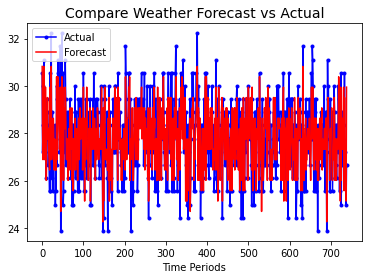

In [ ]:
plt.title("Compare Weather Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(y_test.flatten())), "bo-", markersize=3, label="Actual")
plt.plot(pd.Series(np.ravel(y_pred.flatten())), "r-", markersize=3, label="Forecast")
plt.legend(loc="upper left")
plt.xlabel("Time Periods")
plt.show()

Biểu đồ thể hiện nhiệt độ trong thực tế và đường thẳng hồi quy mà ta đã có qua việc tính toán ở bước trên

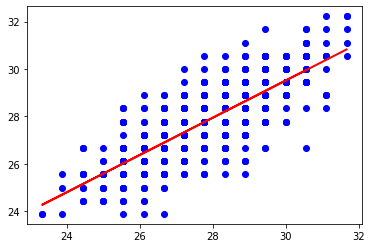

In [ ]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

Để nhìn rõ sự chênh lệch, nhóm chỉ xem 30 dữ liệu tương đương 30 ngày khác nhau. Trong đó màu xanh là thực tế, màu đỏ là dự đoán. Ở biểu đồ này có thể nhìn rõ sự chênh lệch là không lớn

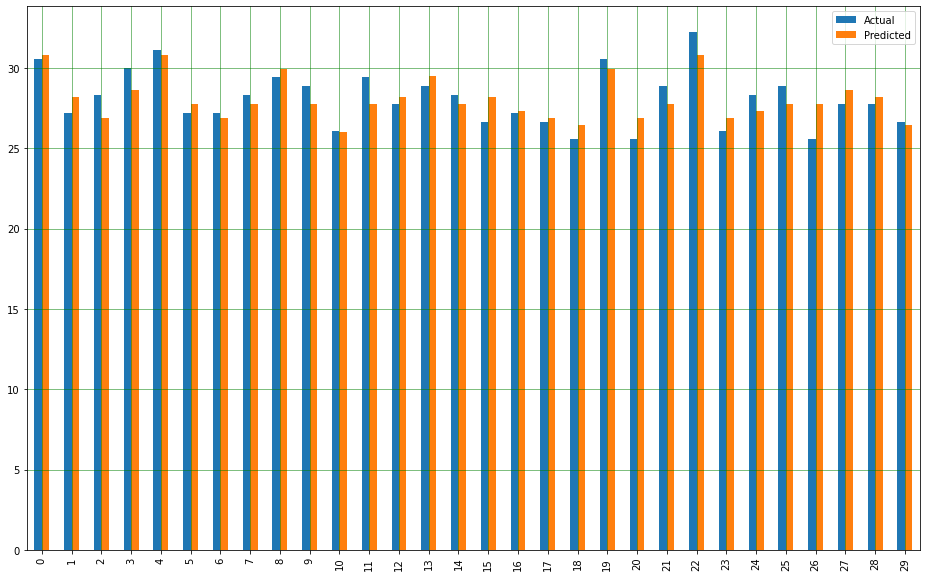

In [ ]:
df1 = df.head(30)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Các hệ số trong mô hình hồi quy, với độ chính xác (R^2) = 62.85%, kết quả dự đoán là tương đối chính xác

In [ ]:
print('R Squared:', metrics.r2_score(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) # MAE

R Squared: 0.6285466543401419
Mean Squared Error: 0.9225370329161722
Root Mean Squared Error: 0.9604879139875588
Mean Absolute Error: 0.753348221452829


Trên đây là chương trình để dự đoán nhiệt độ trung bình theo ngày dựa vào dữ liệu của ngày trước đó bằng cách sử dụng Linear Regression Model.